!pip install ktrain

In [5]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 44.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 46.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=6bfb2695318716eb92053e878f2f9352bb6a40d967b6e8be58f88cd2e8df299b
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

In [8]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])

In [9]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.shape

(5572, 2)

### Cross Validation

In [11]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df,test_size=0.2,random_state=0)

In [12]:
data_train.shape,data_test.shape

((4457, 2), (1115, 2))

In [13]:
(X_train,y_train),(X_test,y_test),preproc = text.texts_from_df(train_df=data_train,
                                                              text_column='text',
                                                              label_columns='label',
                                                              val_df=data_test,
                                                              preprocess_mode='bert')   # or distilbert

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [14]:
model = text.text_classifier(name='bert',
                            train_data=(X_train,y_train),
                            preproc=preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [15]:
learner = ktrain.get_learner(model=model,train_data=(X_train,y_train),
                            val_data=(X_test,y_test), batch_size=6)

In [16]:
learner

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 476s 609ms/step - loss: 0.2497 - accuracy: 0.9129
Epoch 2/2
743/743 [==============================] - 186s 250ms/step - loss: 1.5390 - accuracy: 0.8121


done.
Visually inspect loss plot and select learning rate associated with falling loss


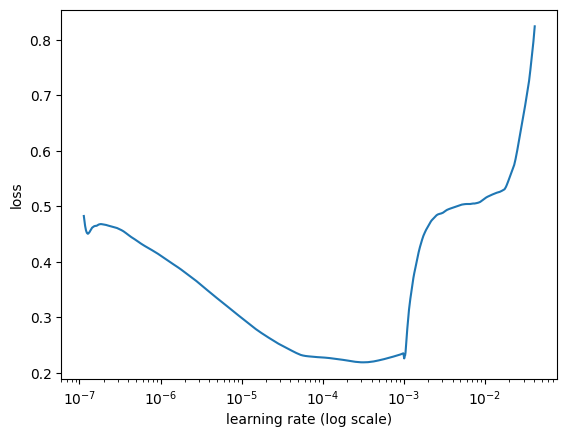

In [17]:
learner.lr_find(show_plot=True,max_epochs=2)

In [26]:
# Fit a very basic training loop
learner.fit_onecycle(lr=2e-5,epochs=1)
predictor = ktrain.get_predictor(learner.model,preproc)
predictor.save('bertspam-classifier')



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 495s 666ms/step - loss: 0.3909 - accuracy: 0.8683 - val_loss: 0.4115 - val_accuracy: 0.8565


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
msg1 = ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']
msg2 = ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C''s apply 08452810075over18s']

In [28]:
predictor.predict(msg1)

['ham']

In [29]:
predictor.predict(msg2)

['ham']